
<p><font size="5">  MOOC: Understanding queues</font></p>
<p><font size="5">  Python Lab
</p></br>
<p><font size="5">  Week II - Part II: M/M/1 queue simulation</p></br>

------------------------

# Introduction

In this second part of the lab, we are going to use the $M/M/1$ queue simulation of the first part to get deeper insight in the subject.

> - Section **I**  is devoted to some calculations useful for the $M/M/1$ queue generation. 
> - In section **II** we compute the steady state distribution of the number of clients in the system.
> - In section **III**, we compute the average time spent by a client in the system. 

# I - M/M/1 queue generation

In this first exercise, we simply recall the derivation of the expression of parameters that we used to write function **generate_MM1** in the first part of the lab of this week. 

**1)** Calculate the probability that the next event is an arrival ? a departure ?

**2)** Calculate the distribution of time between two successive events, depending whether the system is empty or not.

### **Answer to question I-1** 

From a fixed instant $\tau$, let us denote by $X$ the delay to the next event and $X_a$ and $X_d$ the delays to the next arrival and departure respectively. 

If the system is empty, the probability that the next event is an arrival is 1. 

Because of the memoryless property, if the system is not empty, $X_a$ and $X_d$ are independent with distributions $Exp(\lambda)$ and $Exp(\mu)$ and the probability that the next event is an arrival is

$$
\begin{array}{ll}
P(X=X_a)  &= P(X_d> X_a)\\
          &= \int_{x_d>x_a}\lambda e^{-\lambda x_a}\times \mu e^{-\mu x_d}dx_adx_d\\
          &=\int_{x_a=-\infty}^{\infty}\lambda e^{-\lambda x_a}
             \left(\int_{x_d=x_a}^{\infty}  \mu e^{-\mu x_d} dx_d\right) dx_a\\
          &= \int_{x_a=-\infty}^{\infty}\lambda e^{-\lambda x_a}\mu e^{-\mu x_a}dx_a\\
          &= \dfrac{\lambda}{\lambda+\mu}.\\
\end{array}
$$

Thus the probability that the next event is an arrival is $\dfrac{\lambda}{\lambda+\mu}$and the probability that it is a departure is $1-\dfrac{\lambda}{\lambda+\mu}=\dfrac{\mu}{\lambda+\mu}$.


### **Answers to question I-2** 

From a fixed instant $\tau$, if the system is empty, the next event is an arrival and we have $X=X_a$: $X\sim Exp(\lambda)$.

If the system is not empty, $X_a$ and $X_d$ are independent with distributions $Exp(\lambda)$ and $Exp(\mu)$. Then,

$$
\begin{array}{ll}
P(X> t) &= P(X_a>t,X_d>t)\\
           &= P(X_a>t)P(X_d>t)\\
           &= e^{-\lambda t}e^{-\mu t} \\
           &= e^{-(\lambda +\mu) t}.
\end{array}
$$
Thus $X\sim Exp(\lambda +\mu)$.

As a conclusion, if the system is empty, the delay between two successive events follows an $Exp(\lambda)$ distribution and if it is not empty this delay follows an 
$Exp(\lambda +\mu)$ distribution.

# II - Checking the steady state distribution

In this section we check that the state of the system, that is, the number $N$ of clients in the system, tends to be rapidly distributed according to a geometric distribution.

**1)** First, we study sample distributions at a fixed time from the simulation of many trajectories of the number of clients in the system.

> - **1-** Plot $N_{traj}=10$ trajectories of evolution of the number of clients in the system over  $[0,T]$, with $T=30s$. Consider $N_0=5$ and $N_0=10$ for the initial number of clients in the system. What can we observe?
> - **2-** For $N_{traj}=10^4$ trajectories of the number of clients in the $M/M/1$ queue, record the values $N_{T}$ and $N_{2T}$ of the number of clients in the system at instants $T=10s$ and $2T$. Plot the histograms of the number of clients in the system at times $T$ and $2T$. Compare them together and with the steady state distribution of the queue, that is, a geometric distribution with parameter $\rho=\lambda/\mu$. Conclusions? 


**2)** Now, we check that the steady state distribution can also be computed from average times spent in the different states of the system, estimated along one trajectory of the state. When it is satisfied, this property of a random process is known as ergodicity. 

For an observation over $[0,T]$ with $T=10^4$, plot the proportion of time during which there are $N$ clients in the system, for $N=0,\ldots, 10$. Compare this plot to the steady state distribution of the number of clients in the system on a semilog plot. 

In [1]:
%matplotlib inline              
from pylab import *          

In [2]:
# generate_MM1 (studied in the first lab of week 2)

def generate_MM1(λ = 4.,μ = 5.,N0 = 5,Tmax=200):
    """
    function generate_MM1(λ = 4.,μ = 5.,n0 = 5,Tmax=200)
    generates an MM1 file
    INPUTS
    ------
    λ       : intensity of arrivals (default =4.)
    μ       : intensity of departures (default = 5.)
    N0      : initial state of the system (default = 5)
    Tmax    : duration of the observation (default = 200)
    OUTPUTS
    -------
    ρ       : λ/μ
    T       : list of time of events (arrivals or departures) over [0,T]
    N       : list of system state (at T(t): N->N+1 or N->N-1)
    """
    ρ  = λ/μ
    τ  = 0       # initial instant
    T  = [τ]   # list of instants of events
    N  = [N0]    # initial state of the system, list of state evolutions

    while T[-1]<Tmax:
        if N[-1]==0:
            τ     = -1./λ*log(rand()) # inter-arrivals when N(t)=0
            event = 1
        else:
            τ     = -1./(λ+μ)*log(rand()) # inter-arrivals when N(t)>0
            event = 2*(rand()<ρ/(1+ρ))-1 # +1 for an arrival, -1 for a departure
        N = N + [N[-1]+event]
        T = T + [T[-1]+τ]

    T = T[:-1] # event after Tmax is discarded
    N = N[:-1]
    return ρ,T,N

### **Answer to question II-1-1** 

From the plots, its seems that dependency of trajectories against $N_0$ vanishes rapidly after a few seconds.

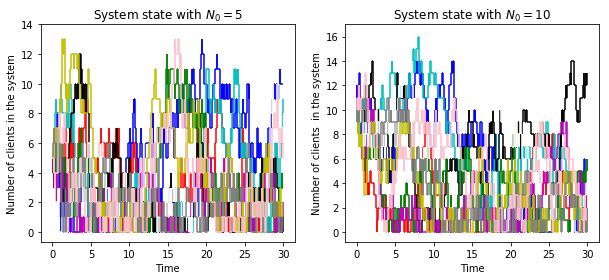

In [3]:
def step(x,y,Tmax=0,color='b'):
    # plots a step function representing the number
    # of clients in the system at each instant
    if Tmax==0:
        Tmax = max(x)
    x = append(x,[Tmax])  # number of clients
    y = append(y,[y[-1]]) # instants of events
    for k in range(len(x)-1):
        vlines(x[k+1],y[k],y[k+1],color=color)
        hlines(y[k],x[k],x[k+1],color=color)

colors  = ('r','b','c','k','g','m','w','y','grey','pink')
Tmax    = 30
figure(figsize=(10., 4.))

subplot(121)
ymax    = 0
for c in colors:
    ρ,T,N = generate_MM1(Tmax=Tmax,N0=5)
    step(T,N,Tmax=Tmax,color = c)
    ymax=maximum(max(N),ymax)
title('System state with $N_0=5$') 
xlabel('Time'), ylabel('Number of clients in the system')
axis(ymax=ymax+1)

subplot(122)
ymax   = 0
for c in colors:
    rho,T,N = generate_MM1(Tmax=Tmax,N0=10)
    step(T,N,Tmax=Tmax,color = c)
    ymax=maximum(max(N),ymax)
title('System state with $N_0=10$') 
xlabel('Time'), ylabel('Number of clients  in the system')
axis(ymax=ymax+1);

### **Answer to question II-1-2** 

From the plots, we check that we get quite similar histograms at $T=10s$ and $2T=20s$ and that these histograms fit well the steady state distribution. However, a slightly better fit is obtained at $2T=20s$, which can be explained by the fact that at larger time the steady state distribution is better approached.

Computation of the histograms for $T=10s$ and $T=20s$.

In [4]:
N_traj     = 10**4
Tmax       = 10
Imax       = 10 # max probability index estimated
P_est_T    = zeros(Imax+1)
P_est_2T   = zeros(Imax+1)
N_T        = zeros(N_traj) # values of N at Tmax
N_2T       = zeros(N_traj) # values of N at 2Tmax

for k in range(N_traj):
    # generating trajectory till Tmax
    ρ,T,N  = generate_MM1(Tmax=Tmax,N0=10)
    N_T[k] = N[-1]
    ##########################################
    # continuing the trajectory till 2Tmax
    # enter the value N0 for the second part of the trajectory
    c     = N[-1]
    ρ,T,N = generate_MM1(Tmax=Tmax,N0=c)
    ##########################################
    N_2T[k] = N[-1]

P_est_T  = array([sum([N_T[k]==i  for k in range(N_traj)]) 
                  for i in range(Imax+1)])/N_traj
P_est_2T = array([sum([N_2T[k]==i for k in range(N_traj)]) 
                  for i in range(Imax+1)])/N_traj

#----------------
V1 = N[0]-N_T[-1]

Plot of the histograms.

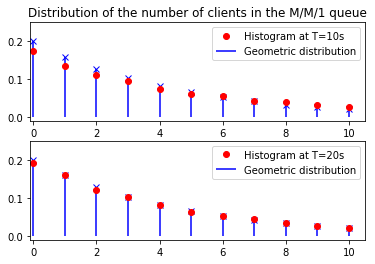

In [5]:
x       = range(Imax+1)              # probability indices
##############################
# Define the steady state distribution of state k (k=0,1,...)
def p(k):
    return (1-ρ)*ρ**k
P       = [p(k) for k in x] # steady state pobabilities
##############################
subplot(211)
vlines(x,0,P,colors='b',label="Geometric distribution")
plot(x, P,'bx')
plot(x, P_est_T,'ro',label="Histogram at T=%ds"%Tmax)
axis(xmin=-.1,ymax=.25)
legend()
title("Distribution of the number of clients in the M/M/1 queue")
subplot(212)
vlines(x,0,P,colors='b',label="Geometric distribution")
plot(x, P,'bx')
plot(x, P_est_2T,'ro',label="Histogram at T=%ds"%(2*Tmax))
axis(xmin=-.1,ymax=.25)
legend();

#----------------
V2 = norm(P-(1-ρ)*array([ρ**k for k in x]))

### **Answer to question II-2** 

Simulation shows that histogram of probabilities calculated from average time spent in the different states fits well the steady state distribution of the $M/M/1$.

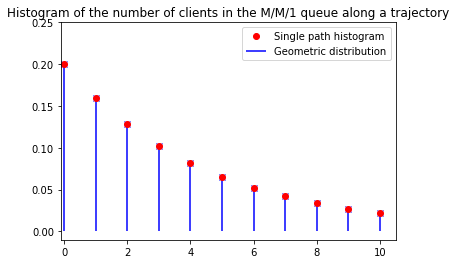

In [6]:
ρ,T,N    = generate_MM1(Tmax=1e4)
Kmax     = 100
T_states = zeros(Kmax+1) # time spent in states 0,...Ip_max
T_states = [sum([T[i+1]-T[i] for i in range(len(N)-1) if N[i]==k]) 
            for k in range(Kmax+1)]
############################
# normalized estimated probabilities for states 0,..,Imax
# [N.count(k)/len(N) for k in range(11)]
P_est = [p(k) for k in x] # estimated probabilities
############################

vlines(x,0,P,colors='b',label="Geometric distribution")
plot(x, P,'bx')
plot(x, P_est,'ro',label="Single path histogram")
title("Histogram of the number of clients in the M/M/1 queue along a trajectory")
axis(xmin=-.1,ymax=.25)
legend()

#--------------
V3 = sum(P_est)

## III - Time spent by clients in the system

In this section, we compute the histogram of the time spent by a client in the system, that is to say the elapsed time from the moment when the client arrives until it goes out of the server. 

**1)** Modify function **generate_MM1** to supply additionally the time spent by users in the system and name this updated function **generate_MM1_v2**.

**2)** For default arguments, check that their is good agreement between the histogram of times spent by users in the system and an exponential distribution $Exp(\mu(1-\rho))$. What can we conclude?

### **Answer to question III-1** 

In [7]:
def generate_MM1_v2(λ = 4.,μ = 5.,N0 = 5,Tmax=200):
    """
    function generate_MM1(λ = 4.,μ = 5.,n0 = 5,Tmax=200)
    generates an MM1 file
    INPUTS
    ------
    λ       : intensity of arrivals (default =4.)
    μ       : intensity of departures (default = 5.)
    N0      : initial state of the queue (default = 5)
    Tmax    : duration of the observation (default = 200)
    delays  : time spent by clients in the system
    OUTPUTS
    -------
    ρ       : λ/μ
    T       : list of time of events (arrivals or departures) over time interval [0,T]
    N       : list of queue state (increases or decreases by one at each event time)
    T_syst  : list of times spent by clients in the system
    """
    ρ       = λ/μ
    p       = λ/(μ+λ) # probability that an event is an arrival for queue > 0
    tau     = 0          # initial instant
    T       = [0]        # list of instants of events
    N       = [N0]       # initial state of the queue, list of queue evolution
    # stack of clients in the system with their entering times
    # (set negative to -1 for clients already present at t=0):
    system  = [-1 for k in range(N0)] 
    delays  = [] # times spent by users inside the system
    
    while T[-1]<Tmax:
        if N[-1]==0:
            # inter-events delay for empty buffer:
            tau   = -1./λ*log(rand()) 
            event = 1
        else:
            # inter-events delay for non-empty buffer:
            τ     = -1./(λ+μ)*log(rand()) 
            # event =+1 for an arrival, =-1 for a departure:
            event = 2*(rand()<p)-1 
        N = N + [N[-1]+event]
        T = T + [T[-1]+τ]
        #-------- New part of the code ----------
        if event == 1:
            # the time of entering client is recorded in 
            # system stack:
            system.append(T[-1])
        else:
            # entry time of outing client:
            T_in = system.pop(0)
            ############################################
            # if the client entered the system after t=0
            # (T_in>0), we add the time he spent in the sytem 
            # to delays list 
            if T_in>0:
                delays.append(T[-1] - T_in)
            ############################################
        #----------------------------------------

    T      = T[:-1] # last event, after t_max, is discarded
    N      = N[:-1]
    return ρ,T,N,delays

In [8]:
λ,μ           = 4.,5.
ρ,T,N,delays  = generate_MM1_v2(λ=4.,μ=5.,Tmax=1e4)

#----------------
V4 = mean(delays)

### **Answer to question III-2** 

Simulation shows that there is a very good agreement between the histogram computed from **generate_MM1_v2** and the distribution $Exp(\mu(1-\rho))$. Indeed, it can be proved that $Exp(\mu(1-\rho))$ is the distribution of the time spent by a client in the  $M/M/1$.

Time spent in the system:
average of measured delays = 0.995
theoretical average delay  =  1.000


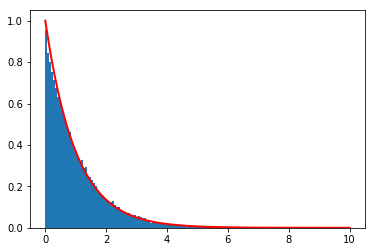

In [9]:
#######################################################
# parameter of the theoretical exponential distribution
# of time spent by a client in the system:
param = 1
#######################################################

# histogram and theoretical distribution:
x = linspace(0,10,100)
hist(delays,bins=100,density=True,label='delays histogram');
plot(x,param*exp(-param*x),linewidth=2,color='r',
                 label=r'$Exp(\mu(1-\rho))$ pdf')

print("Time spent in the system:")
print("average of measured delays = {0:.3f}".format(mean(delays)))
print("theoretical average delay  =  {0:.3f}".format(1/param))

#--------
V5 = param

# Conclusion

In this lab, we have seen how to simulate the $M/M/1$ queue and how parameters such as the number of clients in the system can be estimated from simulation. During the next two weeks, you will study into more details discrete time and continuous time Markov chains and acquire a deeper understanding of the ideas involved in the experiments that we carried out in this laboratory.

# Your answers for this notebook

In [10]:
print("---------------------------------------------------\n"
      +"VALIDITY OF RESULTS SUPPLIED FOR WEEK II - Part II:\n"
      +"---------------------------------------------------")
results  = dict()
for k in range(1,6):
    results["V"+str(k)] = "NO"
    
try: 
    if abs(V1)<.01:      results["V1"] =  "OK"
except: pass
try: 
    if abs(V2)<.01:      results["V2"] =  "OK"
except: pass
try: 
    if abs(V3-.92)<.02:  results["V3"] =  "OK"
except: pass
try: 
    if abs(V4-1)<.05:    results["V4"] =  "OK"
except: pass
try: 
    if abs(V5-1)<.01:    results["V5"] =  "OK"
except: pass

for key,val in results.items():
    print(key,': ',val)

---------------------------------------------------
VALIDITY OF RESULTS SUPPLIED FOR WEEK II - Part II:
---------------------------------------------------
V1 :  OK
V2 :  OK
V3 :  OK
V4 :  OK
V5 :  OK
